In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
from urllib.request import urlopen
import urllib
import time

In [2]:
import re

REGEX_INRTO = "고객님은 \w\w님과 \d+년 \d+월 \d+일부터 총 \d+개의 메세지를 주고 받았습니다. "
REGEX_NEWLINE = "\n"
REGEX_DATE = "\d\d\d\d년 \d+월 \d+일 [월화수목금토일]요일"
REGEX_TIME_NAME = "\w\w \d+:\d+, \w\w : "
REGEX_LAUGH = "ㅋ+"
REGEX_CRY = "[ㅠㅜ]+"
REGEX_URL = "http[s]?:\/\/(?:[a-zA-Z]|[0-9]|[$\-@\.&+:\/?=]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+"
REGEX_SEARCH = "샵검색 : #"


with open("messages.txt", "r") as f:
    message = f.read()
    
REGEX = '|'.join(
    [REGEX_INRTO,
     REGEX_NEWLINE,
     REGEX_DATE,
     REGEX_TIME_NAME,
     REGEX_LAUGH,
     REGEX_CRY,
     REGEX_URL,
     REGEX_SEARCH,])

result = re.sub(REGEX, '', message.replace(REGEX_NEWLINE, ' '))
print(result)

# messages.txt
#고객님은 길순님과 2022년 10월 16일부터 총 24893개의 메세지를 주고 받았습니다. 
#
#
#
#
#2021년 12월 14일 화요일
#오전 11:01, 길동 : 안녕하세요~ 인천대학교 보드게임동아리
#마니또의 요정입니다🧞‍♀️
#2021 보인다 엠티 마니또 배정 결과를 발표합니다!
#오후 11:01, 길동 : 동영상
#오후 11:33, 길순 : 어마아앗
#오후 11:33, 길순 : 마니또인가요? ^^


﻿      안녕하세요~ 인천대학교 보드게임동아리 마니또의 요정입니다🧞‍♀️ 2021 보인다 엠티 마니또 배정 결과를 발표합니다! 동영상 어마아앗 마니또인가요? ^^ 🧞‍♀️ 🧞‍♀️ 🧞‍♀️ 혜미횐님 ^^ 확인했습니다 저에게 너무 높은 분이 마니또인거 아닌가요? 랜덤 잘못 돌린 네이버를 탓하시면 됩니다 아이구~~ 알겠습니다~ 아무튼 즐거운 엠티 되세요~🧞‍♀️ 고생이 많으십니다 네 ^^    지희 횐님 혹시 이번 회의는 참여 불가하신가요? 네네 불가능합니다 생일때문에 풀로 약속이 잡혀서요 다음 회의때 참여하겠습니다 아이구  네 그러면 잘 다녀오세요!! 즐거운 연초 되시길~~~ 네네! 새해 복 많이 받으세요~    지희 횐님 이모티콘  무슨 일이신가요?? 그거그거 총무 하실지말지 물어보려구 왔습니다 꽤 중요한 역할이라구 들었읍니다... 아주... 중요하지요... 마이깟... 이제또 그런자리에 지희횐님이 기가막히시지 않나... 우와... 횐님께서 그렇게 말해주시니 또 고민이 되는군요 ㅎㅎ... 총무가 어떤 일을 하는지 다시 한 번 확인해보려고 하는데 네 톡방에 뭐라구 검색하면 나올까요?? 지난 12월 운영진 회의때 이야기를 제가 캡처해 드릴게요 잠시만 기다려주세요 와아!!! 사진 이 부분이고 인수인계는 지난번에 총무였던 명석이 형이 있으니까 명석이 형에게 물어보면 될거에요 제가 하겠읍니다 엄허나 이모티콘  횐님... 강하시군요 쏘쓰윗~!!~! 강한친구? 강한친구 ㄹㅇ   저도 도울거고 아직 저도 모르는 부분이 많아서 아쥬 든든하군여^^ 같이 하면 될거같아요 ^^ 와아ㅏ~!~! 알겠습니다 그래도 혹시 다른 분들중에 하고 싶은 분이 있을순있으니까 물어보고 오겠습니당 네네! 이모티콘  지희횐님 이모티콘  돌고왔구요 지희 횐님이 총무 짝짞ㅉ깍 하겠습니다 와 와우와 와 와ㅏ~~~ 이모티콘  오늘 자정에 공지할거고 투표도 할 수 있으면 받을게용 포스터 어떤 투표요?! 아아 네네 열심히… 해보겠읍니다... 우리모두,,. 화이탱 넹... 아이챰 왜캐 힘이 없서여 우리는 능히 

In [3]:
# from konlpy.tag import Okt
# okt = Okt()

ko_doc_noun = result.split()

from collections import Counter

count_noun = Counter(ko_doc_noun)
count_noun.most_common(100)

[('이모티콘', 427),
 ('GIF', 345),
 ('SELFIE', 345),
 ('태호', 339),
 ('응', 314),
 ('아', 280),
 ('헉', 266),
 ('누나', 253),
 ('사진', 225),
 ('햄무', 218),
 ('근데', 189),
 ('우웅', 154),
 ('냅다', 136),
 ('그랭', 129),
 ('지금', 126),
 ('태호~', 125),
 ('거', 124),
 ('누나가', 124),
 ('것', 122),
 ('나', 122),
 ('햄무는', 121),
 ('그러면', 117),
 ('휴', 113),
 ('잘', 111),
 ('더', 111),
 ('그', 110),
 ('IMAGE', 108),
 ('오늘', 107),
 ('응응', 107),
 ('수', 106),
 ('안', 103),
 ('ㅇㅇ', 102),
 ('그래서', 98),
 ('STICKER', 95),
 ('사랑해', 94),
 ('태호는', 93),
 ('좀', 91),
 ('다', 89),
 ('태호~~', 89),
 ('내가', 86),
 ('와', 83),
 ('이제', 76),
 ('응~', 74),
 ('한', 73),
 ('ㅇ0ㅇ', 73),
 ('너무', 70),
 ('하고', 66),
 ('오', 65),
 ('응웅', 65),
 ('그리고', 64),
 ('일단', 63),
 ('못', 62),
 ('햄무도', 62),
 ('나는', 61),
 ('내일', 61),
 ('또', 60),
 ('햄무가', 60),
 ('아아', 59),
 ('태호가', 59),
 ('아니', 57),
 ('같아', 57),
 ('마쟈', 57),
 ('왜', 56),
 ('기여어', 56),
 ('할', 55),
 ('바로', 55),
 ('사실', 55),
 ('같이', 54),
 ('게', 54),
 ('우리', 53),
 ('난', 53),
 ('나도', 53),
 ('그냥', 52),
 ('때', 51),


In [8]:
stopword_list = ['이모티콘', 'GIF', 'SELFIE', '사진', 'IMAGE', 'STICKER']

for word in count_noun:
    if len(word) == 1: # 한 글자 짜리도 없애는 게 더 예쁘게 나온다.
        stopword_list.append(word)
        
#stopword_list[-5:]

for stopword in stopword_list:
    if stopword in count_noun:
        count_noun.pop(stopword)

In [9]:
from wordcloud import WordCloud
import numpy as np
from PIL import Image

#count_noun = dict(count_noun)
type(dict(count_noun)) # generate_from_frequencies 는 딕셔너리 타입을 받는다.


dict

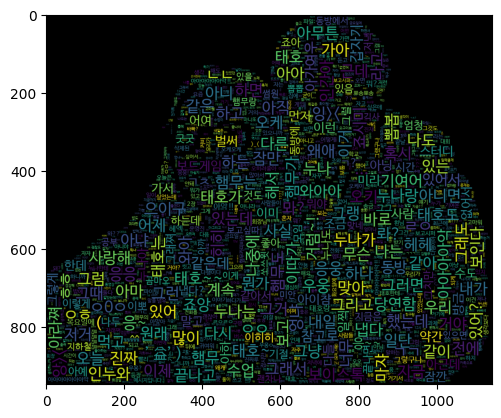

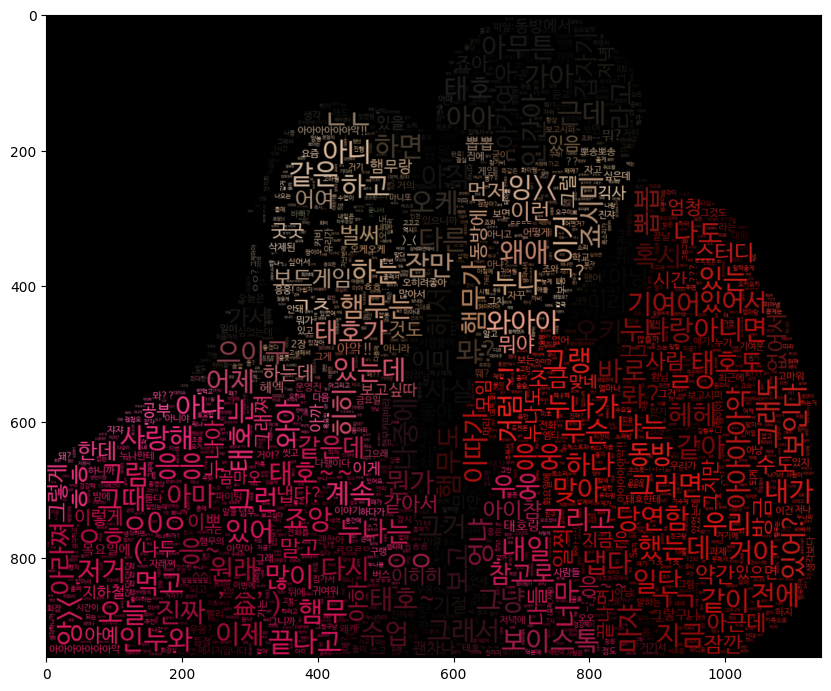

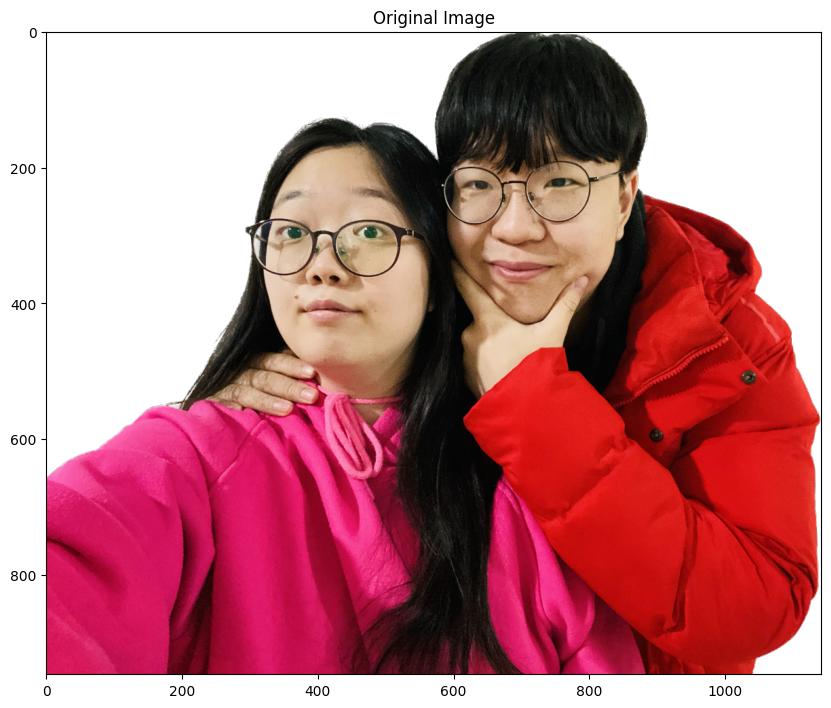

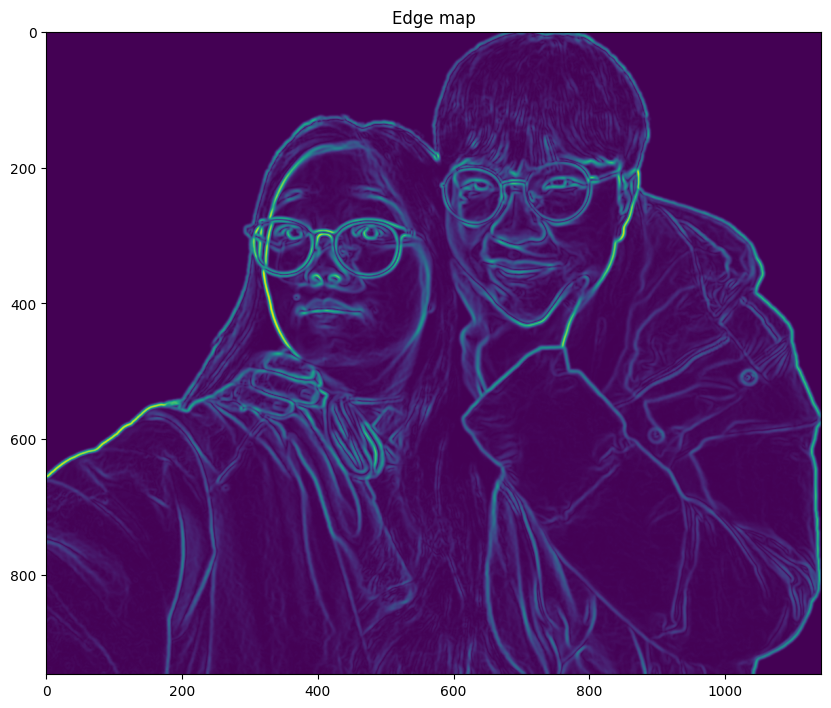

In [10]:
import os
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_gradient_magnitude

from wordcloud import WordCloud, ImageColorGenerator

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = os.path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# load wikipedia text on rainbow
text = count_noun
#text = open(os.path.join(d, 'wiki_rainbow.txt'), encoding="utf-8").read()

# load image. This has been modified in gimp to be brighter and have more saturation.
oort_cloud_color = np.array(Image.open(os.path.join(d, "background.png")))
# subsample by factor of 3. Very lossy but for a wordcloud we don't really care.
oort_cloud_color = oort_cloud_color[::3, ::3]

# create mask  white is "masked out"
oort_cloud_mask = oort_cloud_color.copy()
oort_cloud_mask[oort_cloud_mask.sum(axis=2) == 0] = 255

# some finesse: we enforce boundaries between colors so they get less washed out.
# For that we do some edge detection in the image
edges = np.mean([gaussian_gradient_magnitude(oort_cloud_color[:, :, i] / 255., 2) for i in range(3)], axis=0)
oort_cloud_mask[edges > .08] = 255

# create wordcloud. A bit sluggish, you can subsample more strongly for quicker rendering
# relative_scaling=0 means the frequencies in the data are reflected less
# acurately but it makes a better picture
wc = WordCloud(max_words=2000, font_path='/Library/Fonts/NanumBarunGothic.ttf', mask=oort_cloud_mask, max_font_size=40, random_state=42, relative_scaling=0)

# generate word cloud
wc.generate_from_frequencies(text)
#wc.generate(text)
plt.imshow(wc) # 이제 여기에 색을 입힐 거야!

# create coloring from image
image_colors = ImageColorGenerator(oort_cloud_color)
wc.recolor(color_func=image_colors)
plt.figure(figsize=(10, 10))
plt.imshow(wc, interpolation="bilinear")
wc.to_file("oort_cloud.png")

plt.figure(figsize=(10, 10))
plt.title("Original Image")
plt.imshow(oort_cloud_color)

plt.figure(figsize=(10, 10))
plt.title("Edge map")
plt.imshow(edges)
plt.show()

with open("oort_cloud.svg", "w") as text_file:
    text_file.write(wc.to_svg())